In [27]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import resample

import seaborn as sns
import matplotlib.pylab as plt

## A/B Testing
- Subjects (the thing exposed to treatment) are assigned to two groups that are treated exactly alike, except that the treatment under study differs from one group to another.
- Ideally, subjects are assigned randomly to these groups.


## Hypothesis Testing
- The null hypothesis embodies the notion that nothing significant has occurred, and any observed effect is due to random chance.
- Hypothesis testing assumes the null hypothesis is true, creates a probability model (the "null model"), and tests whether the observed effect is a reasonable outcome of that model.

## Resampling

### Permutation Test: web example

In [28]:
web_times = pd.read_csv('../../data/web_page_data.csv')
web_times['Time'] *= 100

In [36]:
print('# values from web A = ' + str(len(web_times[web_times.Page == 'Page A'])))
print('# values from web B = ' + str(len(web_times[web_times.Page == 'Page B'])))

# values from web A = 21
# values from web B = 15


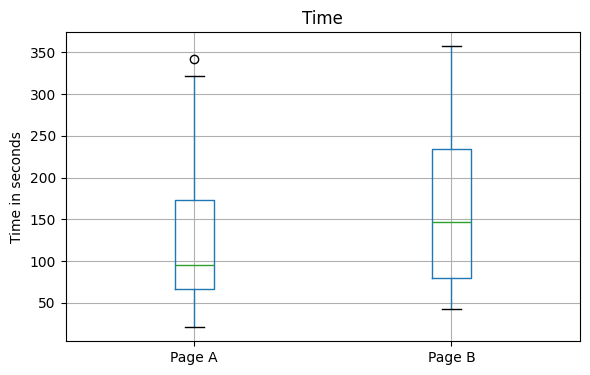

In [29]:
# We hypothesize that longer web page engagement leads to more sales. Our metric is average session time, comparing page A to page B.

ax = web_times.boxplot(by='Page', column='Time', figsize=(6,4))
ax.set_xlabel('')
ax.set_ylabel('Time in seconds')
plt.suptitle('')
plt.tight_layout()

In [31]:
mean_A = web_times[web_times['Page'] == 'Page A']['Time'].mean()
mean_B = web_times[web_times['Page'] == 'Page B']['Time'].mean()

print('Mean session times webpage A = ' + str(round(mean_A, 2)))
print('Mean session times webpage B = ' + str(mean_B))
print('Difference = ' + str(abs(round(mean_A-mean_B, 2))))

Mean session times webpage A = 126.33
Mean session times webpage B = 162.0
Difference = 35.67


Page B clearly leads to longer sessions than page A.  

Page B's session times are, on average, 35.67 seconds longer than Page A's. To determine if this difference is statistically significant or due to random chance, we can use a **permutation test**:  

- Combine all session times, shuffle them, and repeatedly divide them into two groups of 21 (Page A) and 15 (Page B). Then, compare the observed difference to the distribution of differences from the shuffled groups.

In [50]:
def perm_mean_diff(df, n_A, n_B):
    n = n_A + n_B
    new_A = resample(df, n_samples=n_A, replace=False)
    new_B = df.drop(new_A.index)
    return new_B['Time'].mean() - new_A['Time'].mean()

Text(0, 0.5, 'Frequency')

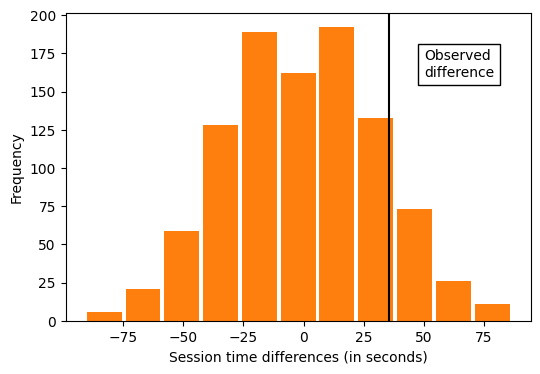

In [71]:
perm_diffs = [perm_mean_diff(web_times, 21, 15) for _ in range(1000)]

fig, ax = plt.subplots(figsize=(6,4))
ax.hist(x=perm_diffs, bins=11, rwidth=0.9, color='C1')
ax.axvline(x = mean_B - mean_A, color='black', lw=1.5)
ax.text(50, 160, 'Observed\ndifference', bbox={'facecolor':'white'})
ax.set_xlabel('Session time differences (in seconds)')
ax.set_ylabel('Frequency')

The mean difference of random permutations often exceeds the observed difference in session times (the vertical line).  
For our results, this happens in 13% of the cases:

In [74]:
np.mean(perm_diffs > mean_B - mean_A)

0.13

This suggests that the observed difference in session time between page A and page B is well within the range of chance variation and thus is not statistically significant.  

### Permutation Tests: Key Takeaways for Data Science

Permutation tests are valuable for exploring random variation. They are easy to code, interpret, and explain, providing a practical alternative to formula-based statistics, which often imply unwarranted precision. Unlike traditional methods, permutation tests are versatile, handling numeric or binary data with equal or different sample sizes, without assuming normal distributions. This flexibility makes permutation tests a robust, one-size-fits-all approach to statistical inference.  

Comparing the observed value of the statistic to the resampled distribution allows you to judge whether an observed difference between samples might occur by chance.